In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import MinMaxScaler
import os
import statistics
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

Using TensorFlow backend.


In [3]:
benign_datas = pd.read_pickle('/home/sdsra/Downloads/CTU-13-Dataset/benign/datas-final-by-origin-tool.pkl')
malware_datas = pd.read_pickle('/home/sdsra/Downloads/CTU-13-Dataset/malware/1/datas.pkl')
for i in [2,3,4,5,6,7,8,9,10,11,12,13,42,43,44,45,46,47,48,49,50,52,53,54]
    tmp_data = pd.read_pickle('/home/sdsra/Downloads/CTU-13-Dataset/malware/{}/datas.pkl'.format(str(i)))
    pd.con malware_datas

In [4]:
numeric_columns = list(filter(lambda x: x not in ['src_ip','dst_ip','dst_port','proto'], benign_datas.columns))

In [5]:
benign_datas['is_malware'] = 0
minMaxScaler = MinMaxScaler()
benign_npScaled = minMaxScaler.fit_transform(benign_datas[numeric_columns])

/home/sdsra/anaconda3/envs/gep-gpu/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [6]:
datas = benign_datas.copy()

In [7]:
datas[numeric_columns] = benign_npScaled

In [8]:
malware_npScaled = minMaxScaler.fit_transform(malware_datas[numeric_columns])

/home/sdsra/anaconda3/envs/gep-gpu/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [9]:
tmp_datas = malware_datas.copy()

In [10]:
tmp_datas[numeric_columns] = malware_npScaled

In [11]:
datas = pd.concat([datas, tmp_datas], ignore_index=True)

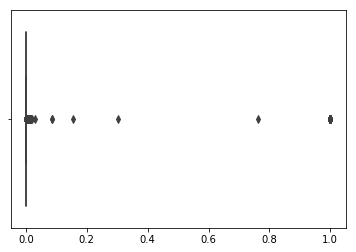

In [12]:
sns.boxplot(datas[numeric_columns[0:3]])

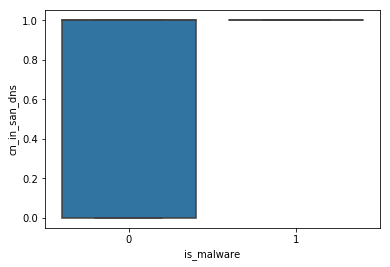

In [13]:
sns.boxplot(x='is_malware', y=numeric_columns[0], data=datas)

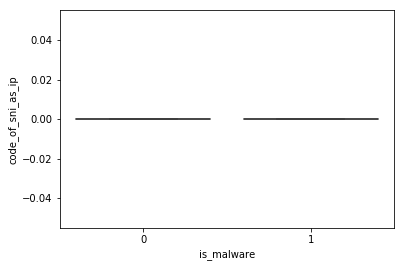

In [14]:
sns.boxplot(x='is_malware', y=numeric_columns[1], data=datas)

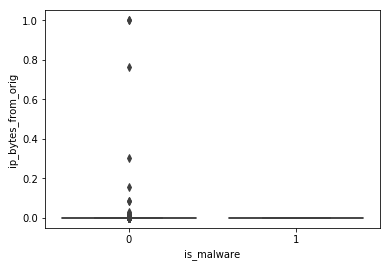

In [15]:
sns.boxplot(x='is_malware', y=numeric_columns[2], data=datas)

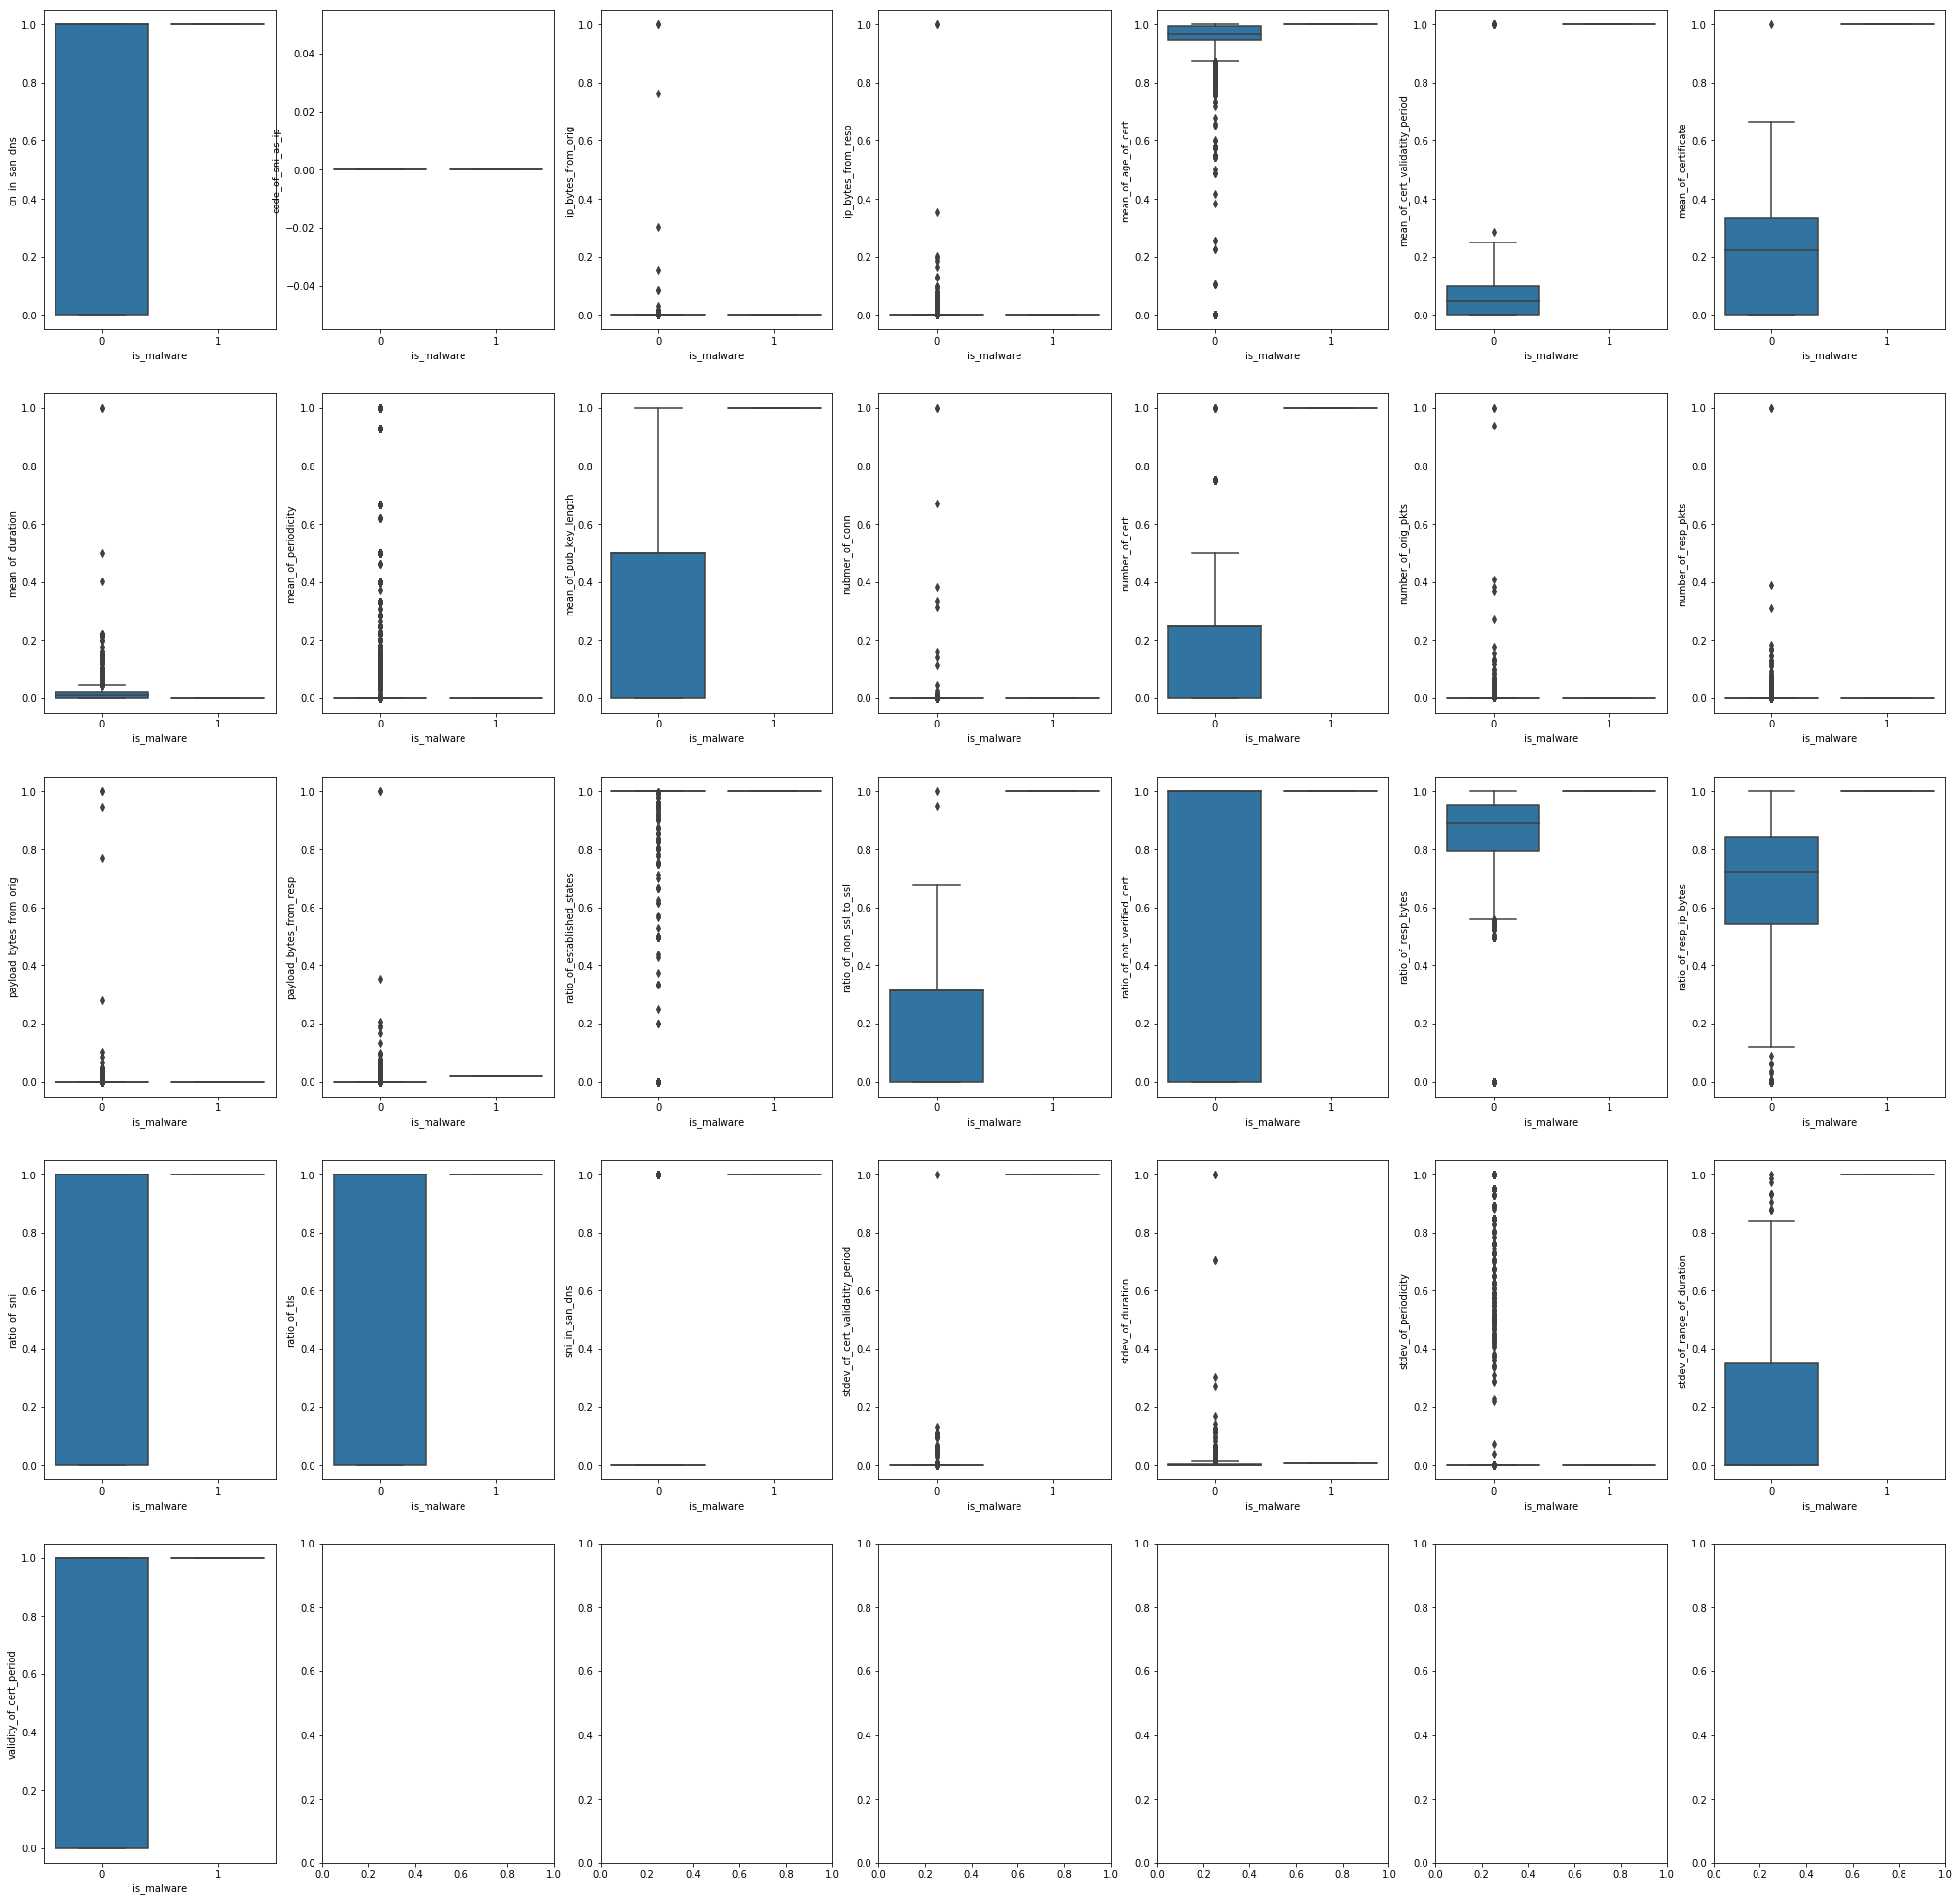

In [33]:
f, axes = plt.subplots(5, 7, figsize=(35,35))
idx = 0
for i in range(4):
    for j in range(7):
        sns.boxplot(x='is_malware', y=numeric_columns[idx], data=datas, ax=axes[i][j])
        idx += 1
sns.boxplot(x='is_malware', y=numeric_columns[idx], data=datas, ax=axes[4][0])



# for i in range(0, len(numeric_columns)):
#     sns.boxplot(x='is_malware', y=numeric_columns[i], data=datas)
#     ax = sns.boxplot(x=tips["total_bill"])
    

In [28]:
len(numeric_columns)

29